***Importing the nescessary libraries***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import max_norm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import InputLayer
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
np.random.seed(0)
from sklearn.model_selection import train_test_split

***Preprocessing the data for use***

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


***Visualizing labels***

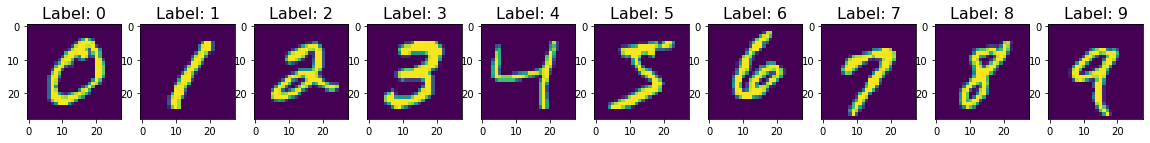

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample)
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [5]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [6]:
x_train =x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

***Simple Logistic Model***

In [9]:
logmodel = Sequential()
logmodel.add(Flatten(input_shape=input_shape))
# No hidden layers
logmodel.add(Dense(10, activation='softmax'))
logmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
logmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = logmodel.fit(x_train,y_train, validation_split=0.167, epochs=10, batch_size=60, verbose=1)


Epoch 1/10
833/833 [==============================] - 5s 3ms/step - loss: 0.5883 - accuracy: 0.8516 - val_loss: 0.3362 - val_accuracy: 0.9119
Epoch 2/10
833/833 [==============================] - 2s 3ms/step - loss: 0.3393 - accuracy: 0.9063 - val_loss: 0.2934 - val_accuracy: 0.9190
Epoch 3/10
833/833 [==============================] - 2s 2ms/step - loss: 0.3064 - accuracy: 0.9148 - val_loss: 0.2776 - val_accuracy: 0.9245
Epoch 4/10
833/833 [==============================] - 2s 3ms/step - loss: 0.2913 - accuracy: 0.9185 - val_loss: 0.2704 - val_accuracy: 0.9253
Epoch 5/10
833/833 [==============================] - 2s 3ms/step - loss: 0.2816 - accuracy: 0.9212 - val_loss: 0.2686 - val_accuracy: 0.9255
Epoch 6/10
833/833 [==============================] - 2s 3ms/step - loss: 0.2751 - accuracy: 0.9236 - val_loss: 0.2603 - val_accuracy: 0.9294
Epoch 7/10
833/833 [==============================] - 2s 2ms/step - loss: 0.2704 - accuracy: 0.9244 - val_loss: 0.2600 - val_accuracy: 0.9291
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


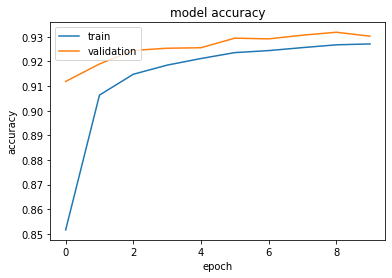

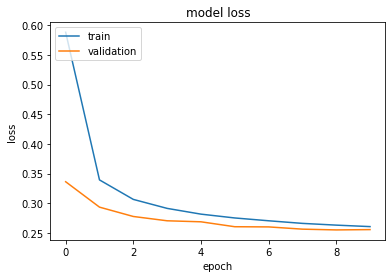

In [11]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
train_loss, train_acc = logmodel.evaluate(x_train, y_train)
print("train Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = logmodel.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2545 - accuracy: 0.9291
train Loss: 0.25445565581321716, train Accuracy: 0.9290666580200195
313/313 [==============================] - 1s 5ms/step - loss: 0.2669 - accuracy: 0.9256
Test Loss: 0.2669398784637451, Test Accuracy: 0.925599992275238


*This was a simple enough model and not much overfitting has been seen.*

***Standard neural net with 2 layers, 800 units***

In [13]:
model1 = Sequential()
model1.add(Flatten(input_shape=input_shape))
model1.add(Dense(800, activation='sigmoid'))
model1.add(Dense(800, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 800)               628000    
                                                                 
 dense_2 (Dense)             (None, 800)               640800    
                                                                 
 dense_3 (Dense)             (None, 10)                8010      
                                                                 
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model1.fit(x_train,y_train, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

Epoch 1/10
833/833 [==============================] - 3s 3ms/step - loss: 0.4225 - accuracy: 0.8706 - val_loss: 0.2242 - val_accuracy: 0.9361
Epoch 2/10
833/833 [==============================] - 3s 3ms/step - loss: 0.1876 - accuracy: 0.9437 - val_loss: 0.1575 - val_accuracy: 0.9540
Epoch 3/10
833/833 [==============================] - 3s 3ms/step - loss: 0.1251 - accuracy: 0.9618 - val_loss: 0.1223 - val_accuracy: 0.9624
Epoch 4/10
833/833 [==============================] - 3s 3ms/step - loss: 0.0897 - accuracy: 0.9722 - val_loss: 0.1050 - val_accuracy: 0.9689
Epoch 5/10
833/833 [==============================] - 3s 3ms/step - loss: 0.0661 - accuracy: 0.9785 - val_loss: 0.0793 - val_accuracy: 0.9756
Epoch 6/10
833/833 [==============================] - 3s 3ms/step - loss: 0.0508 - accuracy: 0.9833 - val_loss: 0.0829 - val_accuracy: 0.9750
Epoch 7/10
833/833 [==============================] - 3s 3ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0740 - val_accuracy: 0.9787
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


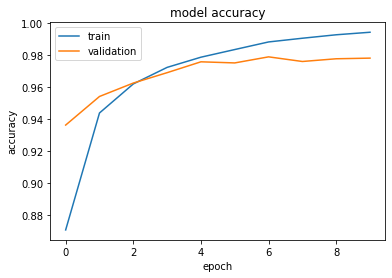

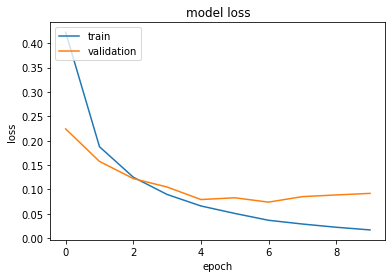

In [15]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
train_loss, train_acc = model1.evaluate(x_train, y_train)
print("train Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9920
train Loss: 0.02728770673274994, train Accuracy: 0.9920499920845032
313/313 [==============================] - 1s 2ms/step - loss: 0.0834 - accuracy: 0.9791
Test Loss: 0.08341121673583984, Test Accuracy: 0.9790999889373779


***Looking at effect of dropout rate***

***There's a hint of overfitting, in this model, so using dropout in both hidden layer***

In [17]:
test=[]
train=[]

In [18]:
model1 = Sequential()
model1.add(Flatten(input_shape=input_shape))
model1.add(Dense(800, activation='sigmoid'))
model1.add(Dropout(0.25))
model1.add(Dense(800, activation='sigmoid'))
model1.add(Dropout(0.25))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 800)               628000    
                                                                 
 dropout (Dropout)           (None, 800)               0         
                                                                 
 dense_5 (Dense)             (None, 800)               640800    
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                8010      
                                                                 
Total params: 1,276,810
Trainable params: 1,276,810
No

In [19]:
history = model1.fit(x_train,y_train, validation_split=0.167, epochs=10, batch_size=60, verbose=1)


Epoch 1/10
833/833 [==============================] - 3s 3ms/step - loss: 0.4637 - accuracy: 0.8568 - val_loss: 0.2189 - val_accuracy: 0.9355
Epoch 2/10
833/833 [==============================] - 3s 3ms/step - loss: 0.2101 - accuracy: 0.9366 - val_loss: 0.1584 - val_accuracy: 0.9545
Epoch 3/10
833/833 [==============================] - 3s 3ms/step - loss: 0.1465 - accuracy: 0.9554 - val_loss: 0.1059 - val_accuracy: 0.9696
Epoch 4/10
833/833 [==============================] - 3s 4ms/step - loss: 0.1073 - accuracy: 0.9667 - val_loss: 0.0900 - val_accuracy: 0.9723
Epoch 5/10
833/833 [==============================] - 3s 3ms/step - loss: 0.0864 - accuracy: 0.9731 - val_loss: 0.0869 - val_accuracy: 0.9734
Epoch 6/10
833/833 [==============================] - 3s 3ms/step - loss: 0.0703 - accuracy: 0.9767 - val_loss: 0.0771 - val_accuracy: 0.9761
Epoch 7/10
833/833 [==============================] - 3s 3ms/step - loss: 0.0577 - accuracy: 0.9816 - val_loss: 0.0762 - val_accuracy: 0.9771
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


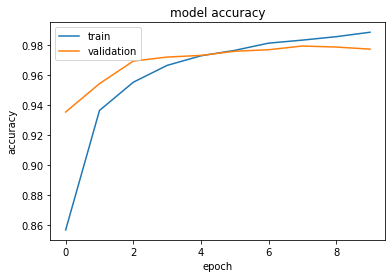

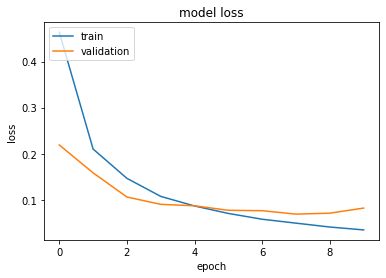

In [20]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [21]:
train_loss, train_acc = logmodel.evaluate(x_train, y_train)
print("train Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
train2=train_loss
test2=test_loss
train.append(train2)
test.append(test2)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2545 - accuracy: 0.9291
train Loss: 0.25445565581321716, train Accuracy: 0.9290666580200195
313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9787
Test Loss: 0.0733855739235878, Test Accuracy: 0.9786999821662903


In [22]:
model1 = Sequential()
model1.add(Flatten(input_shape=input_shape))
model1.add(Dense(800, input_shape=input_shape, activation='sigmoid'))
model1.add(Dropout(0.5))
model1.add(Dense(800, activation='sigmoid'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 800)               628000    
                                                                 
 dropout_2 (Dropout)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 800)               640800    
                                                                 
 dropout_3 (Dropout)         (None, 800)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                8010      
                                                                 
Total params: 1,276,810
Trainable params: 1,276,810
No

In [23]:
history = model1.fit(x_train,y_train, validation_split=0.167, epochs=10, batch_size=60, verbose=1)


Epoch 1/10
833/833 [==============================] - 4s 4ms/step - loss: 0.5561 - accuracy: 0.8229 - val_loss: 0.2232 - val_accuracy: 0.9318
Epoch 2/10
833/833 [==============================] - 3s 3ms/step - loss: 0.2542 - accuracy: 0.9228 - val_loss: 0.1556 - val_accuracy: 0.9553
Epoch 3/10
833/833 [==============================] - 3s 3ms/step - loss: 0.1887 - accuracy: 0.9423 - val_loss: 0.1280 - val_accuracy: 0.9618
Epoch 4/10
833/833 [==============================] - 3s 3ms/step - loss: 0.1499 - accuracy: 0.9535 - val_loss: 0.1036 - val_accuracy: 0.9706
Epoch 5/10
833/833 [==============================] - 3s 3ms/step - loss: 0.1272 - accuracy: 0.9599 - val_loss: 0.0961 - val_accuracy: 0.9704
Epoch 6/10
833/833 [==============================] - 3s 4ms/step - loss: 0.1069 - accuracy: 0.9663 - val_loss: 0.0871 - val_accuracy: 0.9744
Epoch 7/10
833/833 [==============================] - 3s 3ms/step - loss: 0.0960 - accuracy: 0.9705 - val_loss: 0.0795 - val_accuracy: 0.9770
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


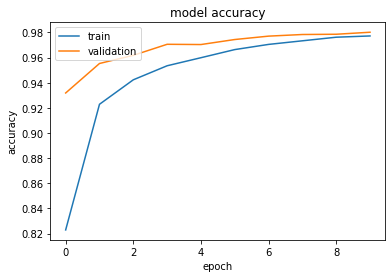

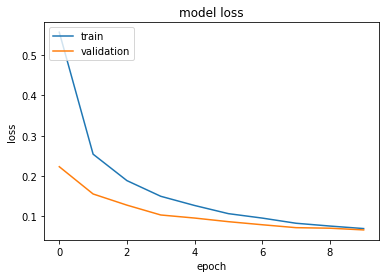

In [24]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
train_loss, train_acc = model1.evaluate(x_train, y_train)
print("train Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
train5=train_loss
test5=test_loss
train.append(train5)
test.append(test5)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0357 - accuracy: 0.9888
train Loss: 0.03569772094488144, train Accuracy: 0.9887999892234802
313/313 [==============================] - 1s 3ms/step - loss: 0.0662 - accuracy: 0.9783
Test Loss: 0.06617365777492523, Test Accuracy: 0.9782999753952026


***As we can see, after we increased the dropout rate separation between the train and validation error and scores
have separated more, with validation accuracy increasing than train accuracy and validation loss reducing compared to the train loss, than we had seen in the previous model***

In [26]:
model1 = Sequential()
model1.add(Flatten(input_shape=input_shape))
model1.add(Dense(800, input_shape=input_shape, activation='sigmoid'))
model1.add(Dropout(0.8))
model1.add(Dense(800, activation='sigmoid'))
model1.add(Dropout(0.8))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 800)               628000    
                                                                 
 dropout_4 (Dropout)         (None, 800)               0         
                                                                 
 dense_11 (Dense)            (None, 800)               640800    
                                                                 
 dropout_5 (Dropout)         (None, 800)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                8010      
                                                                 
Total params: 1,276,810
Trainable params: 1,276,810
No

In [27]:
history = model1.fit(x_train,y_train, validation_split=0.167, epochs=10, batch_size=60, verbose=1)


Epoch 1/10
833/833 [==============================] - 3s 3ms/step - loss: 0.9901 - accuracy: 0.6701 - val_loss: 0.3082 - val_accuracy: 0.9106
Epoch 2/10
833/833 [==============================] - 3s 3ms/step - loss: 0.4343 - accuracy: 0.8665 - val_loss: 0.2336 - val_accuracy: 0.9276
Epoch 3/10
833/833 [==============================] - 3s 3ms/step - loss: 0.3474 - accuracy: 0.8930 - val_loss: 0.1880 - val_accuracy: 0.9416
Epoch 4/10
833/833 [==============================] - 3s 3ms/step - loss: 0.3018 - accuracy: 0.9087 - val_loss: 0.1637 - val_accuracy: 0.9502
Epoch 5/10
833/833 [==============================] - 3s 3ms/step - loss: 0.2695 - accuracy: 0.9188 - val_loss: 0.1496 - val_accuracy: 0.9542
Epoch 6/10
833/833 [==============================] - 3s 3ms/step - loss: 0.2459 - accuracy: 0.9257 - val_loss: 0.1350 - val_accuracy: 0.9588
Epoch 7/10
833/833 [==============================] - 3s 3ms/step - loss: 0.2276 - accuracy: 0.9310 - val_loss: 0.1238 - val_accuracy: 0.9622
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


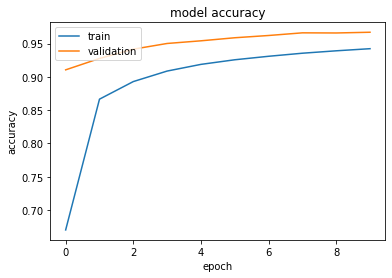

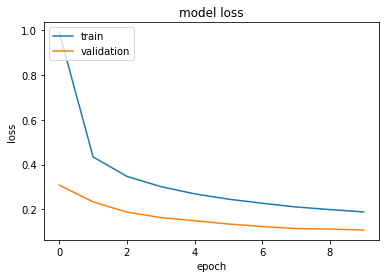

In [28]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
train_loss, train_acc = model1.evaluate(x_train, y_train)
print("train Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
train8=train_loss
test8=test_loss
train.append(train8)
test.append(test8)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0997 - accuracy: 0.9689
train Loss: 0.0996801108121872, train Accuracy: 0.9688500165939331
313/313 [==============================] - 1s 2ms/step - loss: 0.1136 - accuracy: 0.9649
Test Loss: 0.11359070986509323, Test Accuracy: 0.964900016784668


<function matplotlib.pyplot.show(*args, **kw)>

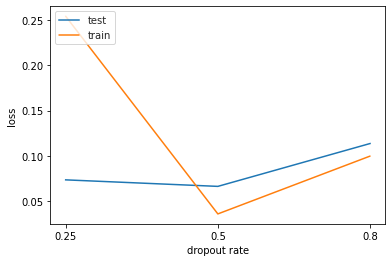

In [30]:
plt.plot(test)
sns.set_style('whitegrid')
plt.plot(train)
plt.legend()
plt.ylabel('loss')
plt.xlabel('dropout rate')
dropout_rate=[0.25,0.5,0.8]
plt.xticks(range(len(dropout_rate)),dropout_rate)
plt.legend(['test', 'train'], loc='upper left')
#plt.grid(color = 'cyan', linestyle = '-', linewidth = 0.5)
plt.show


***As we increase dropout the level of overfitting is decreasing, and after larger dropout rates the difference again starts decreasing...so a medium dropout rate gives better improvements on overfitting***

***The 784-2048-2048-2048-10 Architecture***

In [31]:
model1 = Sequential()
#model1.add(Dense(784, input_shape=input_shape, activation='sigmoid'))
#model1.add(Flatten(Dense(input_shape=input_shape, activation='sigmoid')))
model1.add(Flatten(input_shape=input_shape))
model1.add(Dense(2048, activation='sigmoid'))
model1.add(Dense(2048, activation='sigmoid'))
model1.add(Dense(2048, activation='sigmoid'))
#model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 2048)              1607680   
                                                                 
 dense_14 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_15 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_16 (Dense)            (None, 10)                20490     
                                                                 
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model1.fit(x_train,y_train, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

Epoch 1/10
833/833 [==============================] - 5s 5ms/step - loss: 0.6311 - accuracy: 0.7929 - val_loss: 0.2116 - val_accuracy: 0.9367
Epoch 2/10
833/833 [==============================] - 4s 5ms/step - loss: 0.1742 - accuracy: 0.9466 - val_loss: 0.1421 - val_accuracy: 0.9574
Epoch 3/10
833/833 [==============================] - 4s 5ms/step - loss: 0.1119 - accuracy: 0.9659 - val_loss: 0.1168 - val_accuracy: 0.9672
Epoch 4/10
833/833 [==============================] - 5s 6ms/step - loss: 0.0813 - accuracy: 0.9743 - val_loss: 0.0952 - val_accuracy: 0.9717
Epoch 5/10
833/833 [==============================] - 4s 5ms/step - loss: 0.0599 - accuracy: 0.9814 - val_loss: 0.0865 - val_accuracy: 0.9747
Epoch 6/10
833/833 [==============================] - 4s 5ms/step - loss: 0.0467 - accuracy: 0.9846 - val_loss: 0.0943 - val_accuracy: 0.9748
Epoch 7/10
833/833 [==============================] - 4s 5ms/step - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0794 - val_accuracy: 0.9784
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


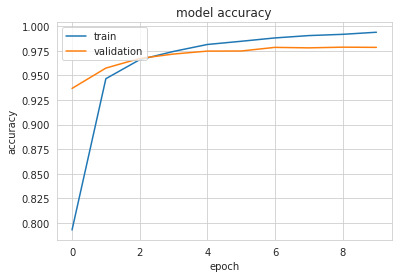

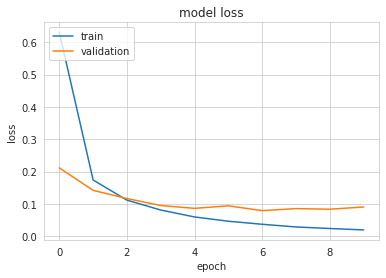

In [33]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
train_loss, train_acc = model1.evaluate(x_train, y_train)
print("train Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0309 - accuracy: 0.9910
train Loss: 0.03088175505399704, train Accuracy: 0.9909999966621399
313/313 [==============================] - 1s 3ms/step - loss: 0.0841 - accuracy: 0.9788
Test Loss: 0.08413401246070862, Test Accuracy: 0.9787999987602234


***The test loss increases drastically with suggests there is overfitting, for this large architecture, so we are using dropout of 0.5 at each hidden layer and a max norm constraint of 2***

In [35]:
model2 = Sequential()
#model2.add(Dense(784, input_shape=input_shape, activation='sigmoid'))
#model2.add(Flatten(Dense(input_shape=input_shape, activation='sigmoid')))
model2.add(Flatten(input_shape=input_shape))
model2.add(Dense(2048, activation='sigmoid',kernel_constraint=max_norm(2)))
model2.add(Dropout(0.5))
model2.add(Dense(2048, activation='sigmoid',kernel_constraint=max_norm(2)))
model2.add(Dropout(0.5))
model2.add(Dense(2048, activation='sigmoid',kernel_constraint=max_norm(2)))
model2.add(Dropout(0.5))
#model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_7 (Dropout)         (None, 2048)              0         
                                                                 
 dense_19 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_8 (Dropout)         (None, 2048)             

In [36]:
history = model2.fit(x_train,y_train, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

Epoch 1/10
833/833 [==============================] - 5s 5ms/step - loss: 2.4997 - accuracy: 0.1037 - val_loss: 2.3042 - val_accuracy: 0.1670
Epoch 2/10
833/833 [==============================] - 4s 5ms/step - loss: 2.4017 - accuracy: 0.1057 - val_loss: 2.3039 - val_accuracy: 0.0989
Epoch 3/10
833/833 [==============================] - 4s 5ms/step - loss: 2.3588 - accuracy: 0.1100 - val_loss: 2.2861 - val_accuracy: 0.1062
Epoch 4/10
833/833 [==============================] - 4s 5ms/step - loss: 2.3379 - accuracy: 0.1126 - val_loss: 2.2865 - val_accuracy: 0.1862
Epoch 5/10
833/833 [==============================] - 4s 5ms/step - loss: 2.3225 - accuracy: 0.1142 - val_loss: 2.2787 - val_accuracy: 0.1882
Epoch 6/10
833/833 [==============================] - 4s 5ms/step - loss: 2.3098 - accuracy: 0.1215 - val_loss: 2.2688 - val_accuracy: 0.1090
Epoch 7/10
833/833 [==============================] - 4s 5ms/step - loss: 2.2991 - accuracy: 0.1279 - val_loss: 2.2601 - val_accuracy: 0.1773
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


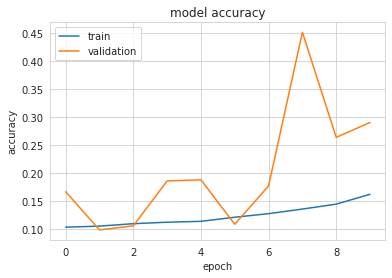

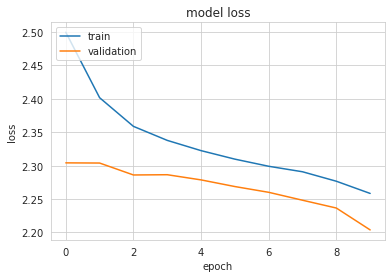

In [37]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [38]:
train_loss, train_acc = model1.evaluate(x_train, y_train)
print("train Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0309 - accuracy: 0.9910
train Loss: 0.03088175505399704, train Accuracy: 0.9909999966621399
313/313 [==============================] - 1s 3ms/step - loss: 0.0841 - accuracy: 0.9788
Test Loss: 0.08413401246070862, Test Accuracy: 0.9787999987602234


***Sigmoid activation is not working well with this architecture, relu performs well here***

In [39]:
model2 = Sequential()
#model2.add(Dense(784, input_shape=input_shape, activation='sigmoid'))
#model2.add(Flatten(Dense(input_shape=input_shape, activation='sigmoid')))
model2.add(Flatten(input_shape=input_shape))
model2.add(Dense(2048, activation='relu',kernel_constraint=max_norm(2)))
model2.add(Dropout(0.5))
model2.add(Dense(2048, activation='relu',kernel_constraint=max_norm(2)))
model2.add(Dropout(0.5))
model2.add(Dense(2048, activation='relu',kernel_constraint=max_norm(2)))
model2.add(Dropout(0.5))
#model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_9 (Dropout)         (None, 2048)              0         
                                                                 
 dense_22 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_10 (Dropout)        (None, 2048)              0         
                                                                 
 dense_23 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_11 (Dropout)        (None, 2048)             

In [40]:
history = model2.fit(x_train,y_train, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

Epoch 1/10
833/833 [==============================] - 5s 6ms/step - loss: 1.1136 - accuracy: 0.6563 - val_loss: 0.3792 - val_accuracy: 0.8872
Epoch 2/10
833/833 [==============================] - 4s 5ms/step - loss: 0.4788 - accuracy: 0.8547 - val_loss: 0.2814 - val_accuracy: 0.9154
Epoch 3/10
833/833 [==============================] - 4s 5ms/step - loss: 0.3740 - accuracy: 0.8880 - val_loss: 0.2383 - val_accuracy: 0.9271
Epoch 4/10
833/833 [==============================] - 4s 5ms/step - loss: 0.3212 - accuracy: 0.9051 - val_loss: 0.2107 - val_accuracy: 0.9371
Epoch 5/10
833/833 [==============================] - 4s 5ms/step - loss: 0.2810 - accuracy: 0.9172 - val_loss: 0.1836 - val_accuracy: 0.9470
Epoch 6/10
833/833 [==============================] - 4s 5ms/step - loss: 0.2504 - accuracy: 0.9259 - val_loss: 0.1689 - val_accuracy: 0.9514
Epoch 7/10
833/833 [==============================] - 4s 5ms/step - loss: 0.2259 - accuracy: 0.9328 - val_loss: 0.1550 - val_accuracy: 0.9549
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


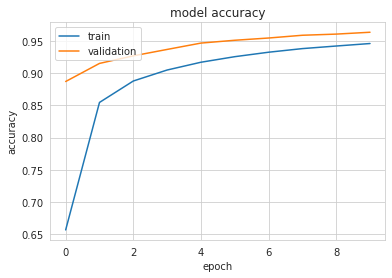

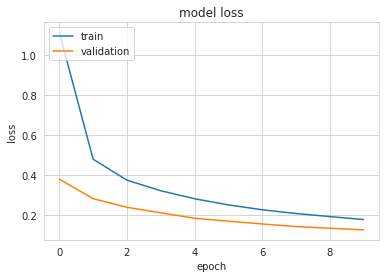

In [42]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
train_loss, train_acc = model1.evaluate(x_train, y_train)
print("train Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0309 - accuracy: 0.9910
train Loss: 0.03088175505399704, train Accuracy: 0.9909999966621399
313/313 [==============================] - 1s 3ms/step - loss: 0.0841 - accuracy: 0.9788
Test Loss: 0.08413401246070862, Test Accuracy: 0.9787999987602234


***So here using dropout layers, and a max norm constraint of 2 gives a better result, also we see that relu activation function performs better, in terms of reducing the validation loss and incresing the vlaidation accuracy***

***Next observing effect on data size, on dropout...***

In [45]:
model1 = Sequential()
#model1.add(Dense(784, input_shape=input_shape, activation='relu'))
#model1.add(Flatten(Dense(input_shape=input_shape, activation='relu')))
model1.add(Flatten(input_shape=input_shape))
model1.add(Dense(2048, activation='relu'))
model1.add(Dense(2048, activation='relu'))
model1.add(Dense(2048, activation='relu'))
#model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

testacc=[]
trainacc=[]
testloss=[]
trainloss=[]

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 2048)              1607680   
                                                                 
 dense_26 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_27 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_28 (Dense)            (None, 10)                20490     
                                                                 
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________


In [46]:
sample_size = 100
rand_ind = np.random.choice(np.arange(60000), sample_size, replace=False)
x_sample1 = x_train[rand_ind]
y_sample1 = y_train[rand_ind]

history = model1.fit(x_sample1,y_sample1, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

train_loss, train_acc = model1.evaluate(x_train, y_train)
print("\ntrain Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
#testacc=[]
test1=test_acc
train1=train_acc
test1l=test_loss
train1l=train_loss
testacc.append(test1)
trainacc.append(train1)
testloss.append(test1l)
trainloss.append(train1l)

Epoch 1/10
2/2 [==============================] - 1s 171ms/step - loss: 2.3426 - accuracy: 0.1325 - val_loss: 2.0074 - val_accuracy: 0.1765
Epoch 2/10
2/2 [==============================] - 0s 30ms/step - loss: 1.4726 - accuracy: 0.4578 - val_loss: 1.0041 - val_accuracy: 0.7647
Epoch 3/10
2/2 [==============================] - 0s 25ms/step - loss: 0.7200 - accuracy: 0.8434 - val_loss: 0.7279 - val_accuracy: 0.8235
Epoch 4/10
2/2 [==============================] - 0s 23ms/step - loss: 0.3156 - accuracy: 0.9398 - val_loss: 0.4866 - val_accuracy: 0.8824
Epoch 5/10
2/2 [==============================] - 0s 27ms/step - loss: 0.0642 - accuracy: 0.9880 - val_loss: 0.5332 - val_accuracy: 0.8824
Epoch 6/10
2/2 [==============================] - 0s 25ms/step - loss: 0.0840 - accuracy: 0.9639 - val_loss: 0.4217 - val_accuracy: 0.8824
Epoch 7/10
2/2 [==============================] - 0s 24ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.3697 - val_accuracy: 0.8824
Epoch 8/10
2/2 [==========

In [47]:
sample_size = 500
rand_ind = np.random.choice(np.arange(60000), sample_size, replace=False)
x_sample1 = x_train[rand_ind]
y_sample1 = y_train[rand_ind]

history = model1.fit(x_sample1,y_sample1, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

train_loss, train_acc = model1.evaluate(x_train, y_train)
print("\ntrain Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
test2=test_acc
train2=train_acc
test2l=test_loss
train2l=train_loss
testacc.append(test2)
trainacc.append(train2)
testloss.append(test2l)
trainloss.append(train2l)

Epoch 1/10
7/7 [==============================] - 0s 13ms/step - loss: 1.2338 - accuracy: 0.7452 - val_loss: 0.5192 - val_accuracy: 0.8333
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: 0.4508 - accuracy: 0.8365 - val_loss: 0.5767 - val_accuracy: 0.7976
Epoch 3/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2167 - accuracy: 0.9447 - val_loss: 0.4417 - val_accuracy: 0.8571
Epoch 4/10
7/7 [==============================] - 0s 9ms/step - loss: 0.0725 - accuracy: 0.9784 - val_loss: 0.5809 - val_accuracy: 0.8452
Epoch 5/10
7/7 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.9976 - val_loss: 0.6862 - val_accuracy: 0.8095
Epoch 6/10
7/7 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.7321 - val_accuracy: 0.8333
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7651 - val_accuracy: 0.8214
Epoch 8/10
7/7 [=================

In [48]:
sample_size = 1000
rand_ind = np.random.choice(np.arange(60000), sample_size, replace=False)
x_sample1 = x_train[rand_ind]
y_sample1 = y_train[rand_ind]

history = model1.fit(x_sample1,y_sample1, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

train_loss, train_acc = model1.evaluate(x_train, y_train)
print("\ntrain Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
test3=test_acc
train3=train_acc
test3l=test_loss
train3l=train_loss
testacc.append(test3)
trainacc.append(train3)
testloss.append(test3l)
trainloss.append(train3l)


Epoch 1/10
14/14 [==============================] - 0s 9ms/step - loss: 0.6245 - accuracy: 0.8559 - val_loss: 0.4213 - val_accuracy: 0.8922
Epoch 2/10
14/14 [==============================] - 0s 8ms/step - loss: 0.2125 - accuracy: 0.9376 - val_loss: 0.4136 - val_accuracy: 0.9222
Epoch 3/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0953 - accuracy: 0.9688 - val_loss: 0.6663 - val_accuracy: 0.8443
Epoch 4/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0521 - accuracy: 0.9820 - val_loss: 0.3425 - val_accuracy: 0.9102
Epoch 5/10
14/14 [==============================] - 0s 9ms/step - loss: 0.0191 - accuracy: 0.9916 - val_loss: 0.3536 - val_accuracy: 0.9222
Epoch 6/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0065 - accuracy: 0.9988 - val_loss: 0.4705 - val_accuracy: 0.9042
Epoch 7/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.4283 - val_accuracy: 0.9162
Epoch 8/10
14/14 [==

In [49]:
sample_size = 5000
rand_ind = np.random.choice(np.arange(60000), sample_size, replace=False)
x_sample1 = x_train[rand_ind]
y_sample1 = y_train[rand_ind]

history = model1.fit(x_sample1,y_sample1, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

train_loss, train_acc = model1.evaluate(x_train, y_train)
print("\ntrain Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
test4=test_acc
train4=train_acc
test4l=test_loss
train4l=train_loss
testacc.append(test4)
trainacc.append(train4)
testloss.append(test4l)
trainloss.append(train4l)


Epoch 1/10
70/70 [==============================] - 0s 7ms/step - loss: 0.3156 - accuracy: 0.9150 - val_loss: 0.2435 - val_accuracy: 0.9186
Epoch 2/10
70/70 [==============================] - 0s 6ms/step - loss: 0.1287 - accuracy: 0.9606 - val_loss: 0.2449 - val_accuracy: 0.9317
Epoch 3/10
70/70 [==============================] - 0s 6ms/step - loss: 0.0895 - accuracy: 0.9724 - val_loss: 0.2660 - val_accuracy: 0.9317
Epoch 4/10
70/70 [==============================] - 0s 5ms/step - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.3371 - val_accuracy: 0.9138
Epoch 5/10
70/70 [==============================] - 0s 6ms/step - loss: 0.0763 - accuracy: 0.9774 - val_loss: 0.4302 - val_accuracy: 0.9174
Epoch 6/10
70/70 [==============================] - 0s 6ms/step - loss: 0.0621 - accuracy: 0.9832 - val_loss: 0.2647 - val_accuracy: 0.9437
Epoch 7/10
70/70 [==============================] - 0s 6ms/step - loss: 0.0515 - accuracy: 0.9858 - val_loss: 0.2501 - val_accuracy: 0.9389
Epoch 8/10
70/70 [==

In [50]:
sample_size = 10000
rand_ind = np.random.choice(np.arange(60000), sample_size, replace=False)
x_sample1 = x_train[rand_ind]
y_sample1 = y_train[rand_ind]

history = model1.fit(x_sample1,y_sample1, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

train_loss, train_acc = model1.evaluate(x_train, y_train)
print("\ntrain Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
test5=test_acc
train5=train_acc
test5l=test_loss
train5l=train_loss
testacc.append(test5)
trainacc.append(train5)
testloss.append(test5l)
trainloss.append(train5l)


Epoch 1/10
139/139 [==============================] - 1s 6ms/step - loss: 0.2093 - accuracy: 0.9438 - val_loss: 0.1380 - val_accuracy: 0.9623
Epoch 2/10
139/139 [==============================] - 1s 5ms/step - loss: 0.0982 - accuracy: 0.9706 - val_loss: 0.1420 - val_accuracy: 0.9593
Epoch 3/10
139/139 [==============================] - 1s 5ms/step - loss: 0.0662 - accuracy: 0.9795 - val_loss: 0.1625 - val_accuracy: 0.9623
Epoch 4/10
139/139 [==============================] - 1s 5ms/step - loss: 0.0475 - accuracy: 0.9866 - val_loss: 0.1836 - val_accuracy: 0.9617
Epoch 5/10
139/139 [==============================] - 1s 6ms/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.1328 - val_accuracy: 0.9695
Epoch 6/10
139/139 [==============================] - 1s 5ms/step - loss: 0.0289 - accuracy: 0.9916 - val_loss: 0.1247 - val_accuracy: 0.9701
Epoch 7/10
139/139 [==============================] - 1s 5ms/step - loss: 0.0293 - accuracy: 0.9934 - val_loss: 0.2220 - val_accuracy: 0.9575
Epoch 

In [51]:
model1 = Sequential()
#model1.add(Dense(784, input_shape=input_shape, activation='relu'))
#model1.add(Flatten(Dense(input_shape=input_shape, activation='relu')))
model1.add(Flatten(input_shape=input_shape))
model1.add(Dense(2048, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(2048, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(2048, activation='relu'))
model1.add(Dropout(0.5))
#model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

testaccd=[]
trainaccd=[]
testlossd=[]
trainlossd=[]


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_12 (Dropout)        (None, 2048)              0         
                                                                 
 dense_30 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_13 (Dropout)        (None, 2048)              0         
                                                                 
 dense_31 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_14 (Dropout)        (None, 2048)             

In [52]:
sample_size = 100
rand_ind = np.random.choice(np.arange(60000), sample_size, replace=False)
x_sample1 = x_train[rand_ind]
y_sample1 = y_train[rand_ind]


history = model1.fit(x_sample1,y_sample1, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

train_loss, train_acc = model1.evaluate(x_train, y_train)
print("\ntrain Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
#testacc=[]
test1=test_acc
train1=train_acc
test1l=test_loss
train1l=train_loss
testaccd.append(test1)
trainaccd.append(train1)
testlossd.append(test1l)
trainlossd.append(train1l)

Epoch 1/10
2/2 [==============================] - 1s 178ms/step - loss: 2.3676 - accuracy: 0.1446 - val_loss: 2.3837 - val_accuracy: 0.0588
Epoch 2/10
2/2 [==============================] - 0s 27ms/step - loss: 1.9810 - accuracy: 0.2771 - val_loss: 2.0227 - val_accuracy: 0.3529
Epoch 3/10
2/2 [==============================] - 0s 25ms/step - loss: 1.6205 - accuracy: 0.5422 - val_loss: 1.8184 - val_accuracy: 0.4706
Epoch 4/10
2/2 [==============================] - 0s 25ms/step - loss: 1.3377 - accuracy: 0.5904 - val_loss: 1.6155 - val_accuracy: 0.2941
Epoch 5/10
2/2 [==============================] - 0s 43ms/step - loss: 0.9889 - accuracy: 0.6506 - val_loss: 1.6043 - val_accuracy: 0.4706
Epoch 6/10
2/2 [==============================] - 0s 25ms/step - loss: 0.8069 - accuracy: 0.7590 - val_loss: 1.2639 - val_accuracy: 0.5882
Epoch 7/10
2/2 [==============================] - 0s 24ms/step - loss: 0.7376 - accuracy: 0.7831 - val_loss: 0.9525 - val_accuracy: 0.7647
Epoch 8/10
2/2 [==========

In [53]:
sample_size = 500
rand_ind = np.random.choice(np.arange(60000), sample_size, replace=False)
x_sample1 = x_train[rand_ind]
y_sample1 = y_train[rand_ind]


history = model1.fit(x_sample1,y_sample1, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

train_loss, train_acc = model1.evaluate(x_train, y_train)
print("\ntrain Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
#testacc=[]
test2=test_acc
train2=train_acc
test2l=test_loss
train2l=train_loss
testaccd.append(test2)
trainaccd.append(train2)
testlossd.append(test2l)
trainlossd.append(train2l)

Epoch 1/10
7/7 [==============================] - 0s 13ms/step - loss: 1.4678 - accuracy: 0.6322 - val_loss: 0.8526 - val_accuracy: 0.7857
Epoch 2/10
7/7 [==============================] - 0s 13ms/step - loss: 0.7997 - accuracy: 0.7308 - val_loss: 0.6602 - val_accuracy: 0.8095
Epoch 3/10
7/7 [==============================] - 0s 9ms/step - loss: 0.4135 - accuracy: 0.8462 - val_loss: 0.4687 - val_accuracy: 0.8095
Epoch 4/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2566 - accuracy: 0.9183 - val_loss: 0.5084 - val_accuracy: 0.8571
Epoch 5/10
7/7 [==============================] - 0s 9ms/step - loss: 0.1879 - accuracy: 0.9495 - val_loss: 0.4538 - val_accuracy: 0.8214
Epoch 6/10
7/7 [==============================] - 0s 9ms/step - loss: 0.1133 - accuracy: 0.9639 - val_loss: 0.4881 - val_accuracy: 0.8333
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0697 - accuracy: 0.9784 - val_loss: 0.7423 - val_accuracy: 0.8452
Epoch 8/10
7/7 [===============

In [54]:
sample_size = 1000
rand_ind = np.random.choice(np.arange(60000), sample_size, replace=False)
x_sample1 = x_train[rand_ind]
y_sample1 = y_train[rand_ind]


history = model1.fit(x_sample1,y_sample1, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

train_loss, train_acc = model1.evaluate(x_train, y_train)
print("\ntrain Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
#testacc=[]
test3=test_acc
train3=train_acc
test3l=test_loss
train3l=train_loss
testaccd.append(test3)
trainaccd.append(train3)
testlossd.append(test3l)
trainlossd.append(train3l)

Epoch 1/10
14/14 [==============================] - 0s 10ms/step - loss: 0.5867 - accuracy: 0.8523 - val_loss: 0.5682 - val_accuracy: 0.8383
Epoch 2/10
14/14 [==============================] - 0s 8ms/step - loss: 0.3511 - accuracy: 0.8896 - val_loss: 0.5538 - val_accuracy: 0.8443
Epoch 3/10
14/14 [==============================] - 0s 8ms/step - loss: 0.2527 - accuracy: 0.9160 - val_loss: 0.4856 - val_accuracy: 0.8623
Epoch 4/10
14/14 [==============================] - 0s 7ms/step - loss: 0.1461 - accuracy: 0.9484 - val_loss: 0.3502 - val_accuracy: 0.8683
Epoch 5/10
14/14 [==============================] - 0s 8ms/step - loss: 0.1210 - accuracy: 0.9640 - val_loss: 0.3716 - val_accuracy: 0.8982
Epoch 6/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0999 - accuracy: 0.9616 - val_loss: 0.3450 - val_accuracy: 0.8922
Epoch 7/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0889 - accuracy: 0.9712 - val_loss: 0.4646 - val_accuracy: 0.8623
Epoch 8/10
14/14 [=

In [55]:
sample_size = 5000
rand_ind = np.random.choice(np.arange(60000), sample_size, replace=False)
x_sample1 = x_train[rand_ind]
y_sample1 = y_train[rand_ind]


history = model1.fit(x_sample1,y_sample1, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

train_loss, train_acc = model1.evaluate(x_train, y_train)
print("\ntrain Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
#testacc=[]
test4=test_acc
train4=train_acc
test4l=test_loss
train4l=train_loss
testaccd.append(test4)
trainaccd.append(train4)
testlossd.append(test4l)
trainlossd.append(train4l)

Epoch 1/10
70/70 [==============================] - 0s 7ms/step - loss: 0.4028 - accuracy: 0.8905 - val_loss: 0.2277 - val_accuracy: 0.9329
Epoch 2/10
70/70 [==============================] - 0s 6ms/step - loss: 0.2196 - accuracy: 0.9280 - val_loss: 0.1829 - val_accuracy: 0.9485
Epoch 3/10
70/70 [==============================] - 0s 6ms/step - loss: 0.1546 - accuracy: 0.9498 - val_loss: 0.2462 - val_accuracy: 0.9257
Epoch 4/10
70/70 [==============================] - 0s 5ms/step - loss: 0.1583 - accuracy: 0.9517 - val_loss: 0.2162 - val_accuracy: 0.9437
Epoch 5/10
70/70 [==============================] - 0s 5ms/step - loss: 0.1286 - accuracy: 0.9597 - val_loss: 0.1933 - val_accuracy: 0.9425
Epoch 6/10
70/70 [==============================] - 0s 6ms/step - loss: 0.1114 - accuracy: 0.9654 - val_loss: 0.1729 - val_accuracy: 0.9473
Epoch 7/10
70/70 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.9669 - val_loss: 0.2399 - val_accuracy: 0.9473
Epoch 8/10
70/70 [==

In [56]:
sample_size = 10000
rand_ind = np.random.choice(np.arange(60000), sample_size, replace=False)
x_sample1 = x_train[rand_ind]
y_sample1 = y_train[rand_ind]


history = model1.fit(x_sample1,y_sample1, validation_split=0.167, epochs=10, batch_size=60, verbose=1)

train_loss, train_acc = model1.evaluate(x_train, y_train)
print("\ntrain Loss: {}, train Accuracy: {}".format(train_loss, train_acc))
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
#testacc=[]
test5=test_acc
train5=train_acc
test5l=test_loss
train5l=train_loss
testaccd.append(test5)
trainaccd.append(train5)
testlossd.append(test5l)
trainlossd.append(train5l)

Epoch 1/10
139/139 [==============================] - 1s 6ms/step - loss: 0.2871 - accuracy: 0.9222 - val_loss: 0.1429 - val_accuracy: 0.9563
Epoch 2/10
139/139 [==============================] - 1s 5ms/step - loss: 0.1853 - accuracy: 0.9479 - val_loss: 0.1685 - val_accuracy: 0.9527
Epoch 3/10
139/139 [==============================] - 1s 5ms/step - loss: 0.1581 - accuracy: 0.9531 - val_loss: 0.1365 - val_accuracy: 0.9599
Epoch 4/10
139/139 [==============================] - 1s 5ms/step - loss: 0.1374 - accuracy: 0.9586 - val_loss: 0.1433 - val_accuracy: 0.9629
Epoch 5/10
139/139 [==============================] - 1s 5ms/step - loss: 0.1237 - accuracy: 0.9623 - val_loss: 0.1255 - val_accuracy: 0.9623
Epoch 6/10
139/139 [==============================] - 1s 6ms/step - loss: 0.1216 - accuracy: 0.9634 - val_loss: 0.1433 - val_accuracy: 0.9653
Epoch 7/10
139/139 [==============================] - 1s 5ms/step - loss: 0.1151 - accuracy: 0.9675 - val_loss: 0.1505 - val_accuracy: 0.9605
Epoch 

<function matplotlib.pyplot.show(*args, **kw)>

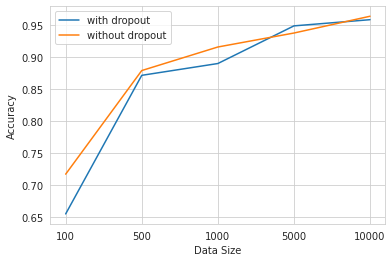

In [57]:
plt.plot(testaccd)
sns.set_style('whitegrid')
plt.plot(testacc)
plt.ylabel('Accuracy')
plt.xlabel('Data Size')
data_size=[100,500,1000,5000,10000]
plt.xticks(range(len(data_size)),data_size)
plt.legend(['with dropout', 'without dropout'], loc='upper left')
#plt.grid(color = 'cyan', linestyle = '-', linewidth = 0.5)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

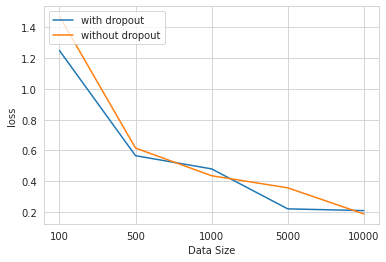

In [58]:
plt.plot(testlossd)
sns.set_style('whitegrid')
plt.plot(testloss)
plt.legend()
plt.ylabel('loss')
plt.xlabel('Data Size')
data_size=[100,500,1000,5000,10000]
plt.xticks(range(len(data_size)),data_size)
plt.legend(['with dropout', 'without dropout'], loc='upper left')
#plt.grid(color = 'cyan', linestyle = '-', linewidth = 0.5)
plt.show


***The above graph shows, that for smaller datasets the dropout does not show significant effect, i.e the without dropout test loss is also less than with dropout test loss, showing no improvement due to applying dropout layers.
But as the dataset gets larger the loss without dropout increases, i.e overfitting is seen without dropout layers, and with dropout the test error starts decreasing giving better result after using dropout layer, due to overfitting. This happens because with smaller datasets the large neural network has enough parameters to overfit the data even after dropout. And the graph shows for a certain architecture, and a given dropout rate there is a certain datasize, with gives similar performance with or without dropout, for us this datasize is somwhere between 500 and 1000, maybe 700.***